In [48]:
# enable In-Line MatPlotLib
%matplotlib inline

In [97]:
# import:
from __future__ import division, print_function
from matplotlib.pyplot import figure, legend, plot, scatter, suptitle, xlabel, ylabel
from numpy import atleast_2d, log, sqrt
from pandas import read_csv
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsRegressor

In [50]:
# CONSTANTS
NB_CROSS_VALIDATION_FOLDS = 5

# Data Pre-Processing

First of all, let's import the Boston Housing data into a **`pandas`** data frame:

In [51]:
# read Boston Housing data into data frame
boston_housing_data = read_csv('DATA_BostonHousing.csv')
boston_housing_data.sort(columns='lstat', inplace=True)
boston_housing_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
192,0.08664,45.0,3.44,0,0.4370,7.178,26.3,6.4798,5,398,15.2,390.49,2.87,36.4
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
370,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
275,0.09604,40.0,6.41,0,0.4470,6.854,42.8,4.2673,4,254,17.6,396.90,2.98,32.0


Let us then focus on the two variables of interest: **`lstat`** (our predictor variable(s) $\mathbf X$) and **`medv`** (our variable to predict $\mathbf y$):

In [52]:
# extract X as 2D matrix (compatible with SciKit-Learn)
X = atleast_2d(boston_housing_data['lstat']).T
X

array([[  1.73],
       [  1.92],
       [  1.98],
       [  2.47],
       [  2.87],
       [  2.88],
       [  2.94],
       [  2.96],
       [  2.97],
       [  2.98],
       [  3.01],
       [  3.11],
       [  3.11],
       [  3.13],
       [  3.16],
       [  3.16],
       [  3.26],
       [  3.32],
       [  3.33],
       [  3.53],
       [  3.53],
       [  3.54],
       [  3.56],
       [  3.57],
       [  3.59],
       [  3.7 ],
       [  3.73],
       [  3.76],
       [  3.76],
       [  3.81],
       [  3.92],
       [  3.95],
       [  3.95],
       [  4.03],
       [  4.08],
       [  4.14],
       [  4.16],
       [  4.21],
       [  4.32],
       [  4.38],
       [  4.45],
       [  4.45],
       [  4.5 ],
       [  4.54],
       [  4.56],
       [  4.56],
       [  4.59],
       [  4.59],
       [  4.61],
       [  4.63],
       [  4.67],
       [  4.69],
       [  4.7 ],
       [  4.73],
       [  4.74],
       [  4.81],
       [  4.82],
       [  4.84],
       [  4.85

In [53]:
# extract y as 2D matrix (compatible with SciKit-Learn)
y = atleast_2d(boston_housing_data['medv']).T
y

array([[ 50. ],
       [ 50. ],
       [ 34.9],
       [ 41.7],
       [ 36.4],
       [ 50. ],
       [ 33.4],
       [ 50. ],
       [ 50. ],
       [ 32. ],
       [ 46. ],
       [ 42.3],
       [ 44. ],
       [ 37.6],
       [ 43.5],
       [ 50. ],
       [ 50. ],
       [ 50. ],
       [ 28.5],
       [ 32.4],
       [ 29.6],
       [ 42.8],
       [ 37.3],
       [ 43.8],
       [ 24.8],
       [ 50. ],
       [ 50. ],
       [ 31.5],
       [ 45.4],
       [ 48.5],
       [ 46.7],
       [ 48.3],
       [ 31.6],
       [ 34.7],
       [ 33.3],
       [ 44.8],
       [ 33.1],
       [ 38.7],
       [ 30.8],
       [ 29.1],
       [ 32.9],
       [ 50. ],
       [ 30.1],
       [ 22.8],
       [ 34.9],
       [ 29.8],
       [ 41.3],
       [ 35.4],
       [ 31.2],
       [ 50. ],
       [ 23.5],
       [ 30.5],
       [ 27.9],
       [ 31.5],
       [ 29. ],
       [ 35.4],
       [ 37.9],
       [ 26.6],
       [ 35.1],
       [ 33.1],
       [ 22.5],
       [ 24. ],
       [

# Objective Loss Function Definition

Let's now define an objective loss function that is appropriate for evaluating this regression task,
in this case the Root Mean Square Error criterion.

_Note that the below function is written to be compliant with what SciKit Learn expects in this [**guide**](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score)._

In [54]:
# define Root-Mean-Square-Error scoring/evaluation function
def rmse_score(estimator, X, y):
    y_predicted = estimator.predict(X)
    nb_cases = len(y)
    return sqrt(((y_predicted - y) ** 2).sum() / nb_cases)

# KNN Regression example with K = 10

Let's try out how well KNN regression with $k = 10$ works:

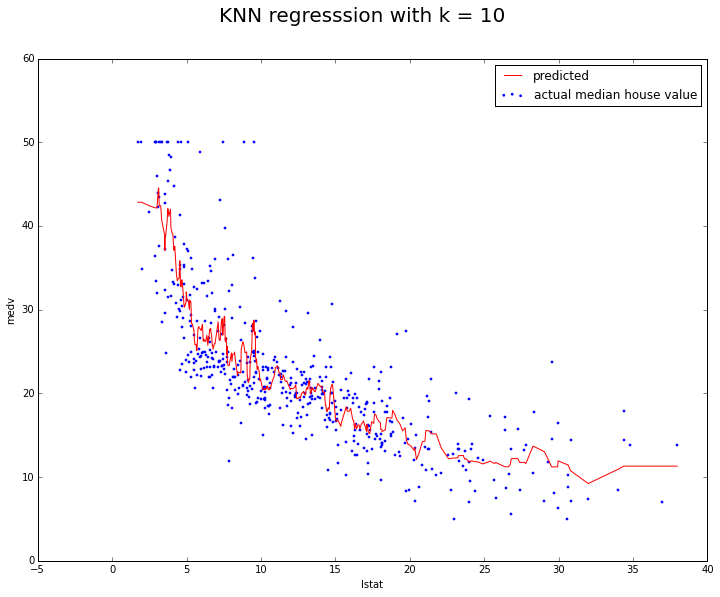

In [99]:
k = 10
knn_algo_10neighbors = KNeighborsRegressor(n_neighbors=k)
knn_fitted_model = knn_algo_10neighbors.fit(X, y)
y_predicted = knn_fitted_model.predict(X)

# plot
figure(figsize=(12, 9))
suptitle('KNN regresssion with k = %i' % k, fontsize=20)
xlabel('lstat')
ylabel('medv')
scatter(X, y, color='blue', s=3, label='actual median house value')
plot(X, y_predicted, color='red', label='predicted')
legend()

Below are the cross-validation RMSE scores for 5 folds with $k = 10$:

In [63]:
rmse_scores = cross_validation.cross_val_score(knn_algo_10neighbors, X, y,
                                              cv=NB_CROSS_VALIDATION_FOLDS,
                                              scoring=rmse_score)

rmse_scores

array([ 11.68053098,   6.56985525,   5.54397157,   3.54884921,   5.84872636])

# Finding $k$ to minimize cross-validation average RMSE

Let's now allow $k$ to vary from 2 to 200, and compute the average RMSE in each case:

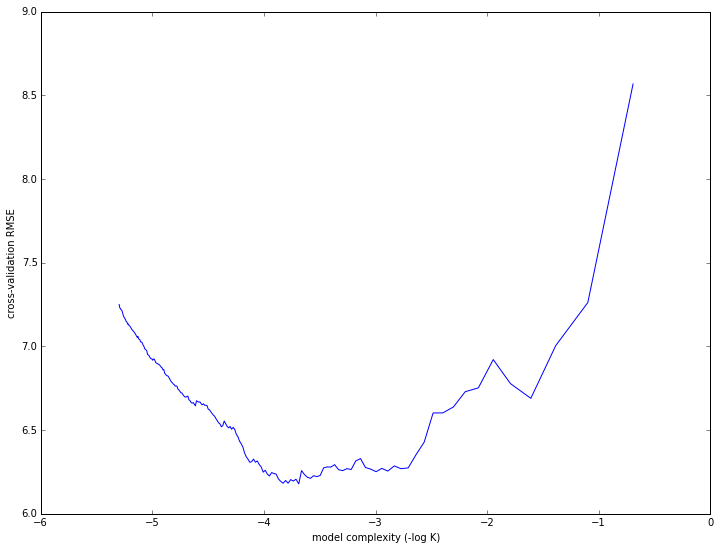

In [90]:
average_cross_validation_rmse = []
k_range = range(2, 201)

for k in k_range:
    knn_algo_10neighbors = KNeighborsRegressor(n_neighbors=k)
    rmse_scores = cross_validation.cross_val_score(knn_algo_10neighbors, X, y,
                                                  cv=NB_CROSS_VALIDATION_FOLDS,
                                                  scoring=rmse_score)
    average_cross_validation_rmse.append(rmse_scores.mean())

# plot
figure(figsize=(12, 9))
xlabel('model complexity (-log K)')
ylabel('cross-validation RMSE')
plot(- log(k_range), average_cross_validation_rmse)

Best $k$ that minimizes cross-validation RMSE:

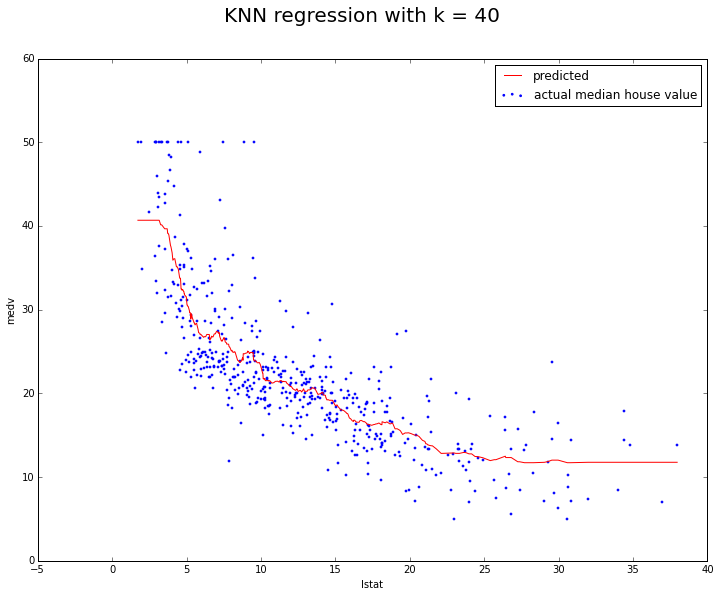

In [101]:
best_k_index = average_cross_validation_rmse.index(min(average_cross_validation_rmse))
best_k = k_range[best_k_index]
best_k

k = best_k
knn_algo_10neighbors = KNeighborsRegressor(n_neighbors=k)
knn_fitted_model = knn_algo_10neighbors.fit(X, y)
y_predicted = knn_fitted_model.predict(X)

# plot
figure(figsize=(12, 9))
suptitle('KNN regression with k = %i' % k, fontsize=20)
xlabel('lstat')
ylabel('medv')
scatter(X, y, color='blue', s=3, label='actual median house value')
plot(X, y_predicted, color='red', label='predicted')
legend()